## Low Pass filter on CSV, in Scala - with Graphics

> First, make sure the classes required by `EvilPlot` are in the Maven repo

For `EvilPlot` documentation:
- see [here](https://medium.com/swlh/plotting-in-jupyter-notebooks-with-scala-and-evilplot-aacab63a896)
- See [here](https://cibotech.github.io/evilplot/)
- and its [git repo](https://github.com/cibotech/evilplot).

- [Plot Catalog](https://cibotech.github.io/evilplot/plot-catalog.html)

In [1]:
println(s"Running from folder ${System.getProperty("user.dir")}")

Running from folder /Users/olivierlediouris/repos/oliv-ai/JupyterNotebooks/lowpass


In [6]:
//import coursier.MavenRepository
import coursierapi._
import coursier._

interp.repositories() ++= Seq(
  MavenRepository.of("https://nexus.corp.com/content/repositories/releases")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://mvnrepository.com/artifact")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://maven.imagej.net/content/repositories/public/")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://dl.bintray.com/cibotech/public")
)
interp.load.ivy("com.cibo" %% "evilplot-repl" % "0.8.0")  // Adds a _2.13 suffix
// import $ivy.`com.cibo::evilplot-repl:0.8.0`

interp.load.ivy("org.scala-js" %% "scalajs-dom_sjs1" % "1.1.0") // Adds a _2.13 suffix
// interp.load.ivy("org.scala-js" %% "scalajs-library" % "1.2.0") 


import coursierapi._

import coursier._



Import the required classes

In [7]:
import com.cibo.evilplot.plot._
//import com.cibo.evilplot.plot.aesthetics.DefaultTheme
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.Point
import com.cibo.evilplot.colors.HTMLNamedColors
import com.cibo.evilplot.geometry._

import com.cibo.evilplot.plot._
//import com.cibo.evilplot.plot.aesthetics.DefaultTheme

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.numeric.Point

import com.cibo.evilplot.colors.HTMLNamedColors

import com.cibo.evilplot.geometry._

A Sample graphic:

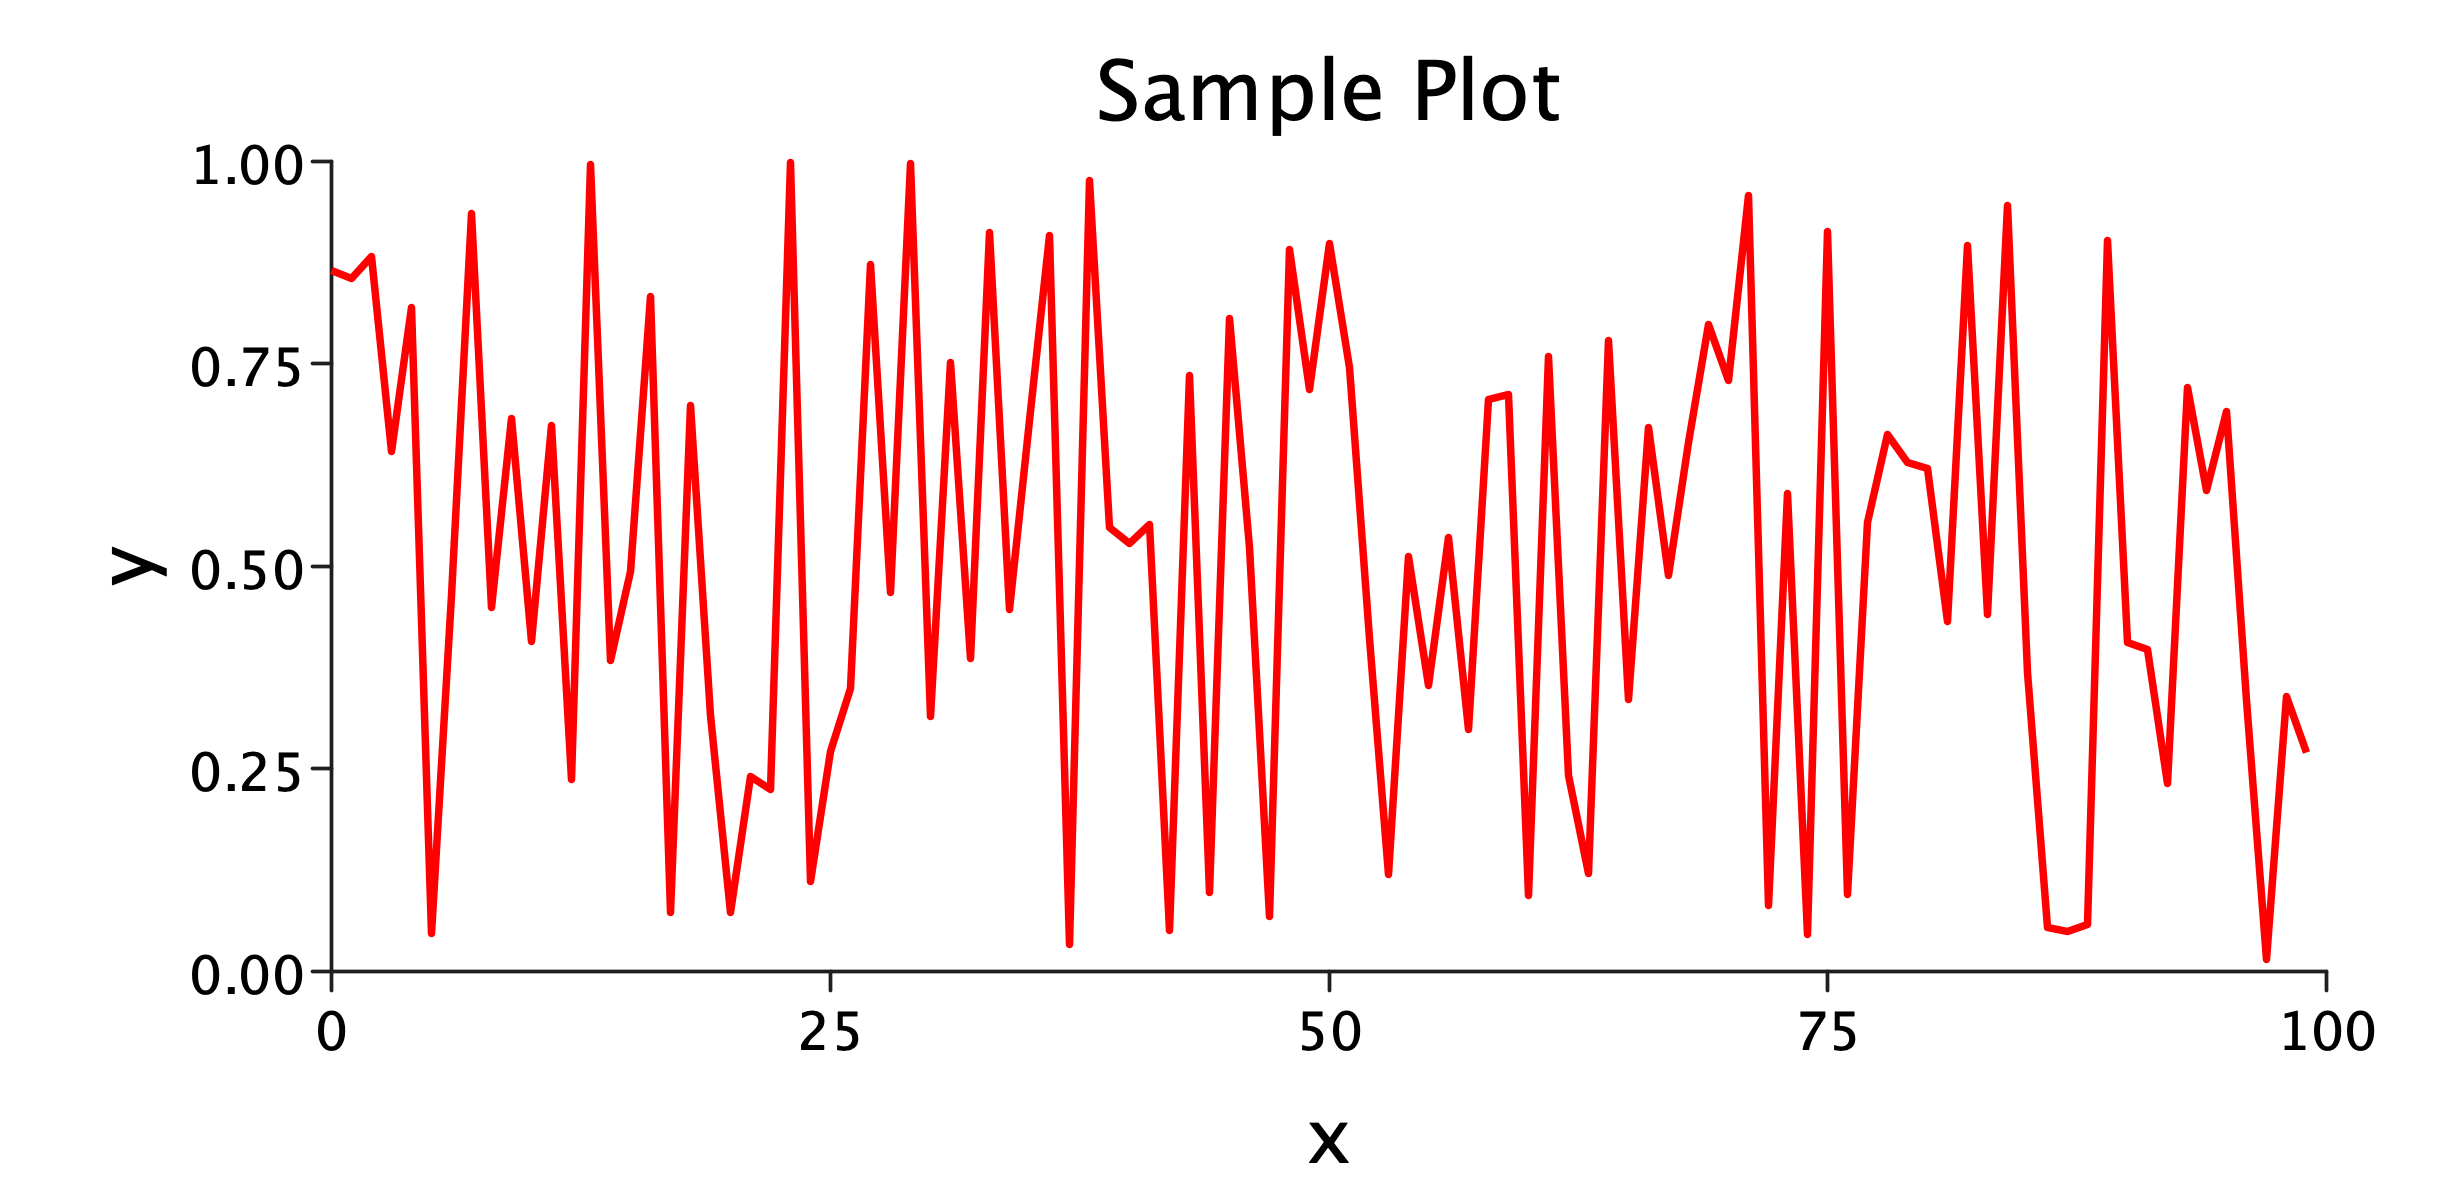

data: Seq[Point] = List(
  Point(0.0, 0.8655416578320597),
  Point(1.0, 0.8553617329243323),
  Point(2.0, 0.8827257515387277),
  Point(3.0, 0.6417482979475753),
  Point(4.0, 0.819583949686742),
  Point(5.0, 0.046531000647431764),
  Point(6.0, 0.4637302204692555),
  Point(7.0, 0.9348907147470709),
  Point(8.0, 0.44909452066501243),
  Point(9.0, 0.6819968959908443),
  Point(10.0, 0.4068502825589053),
  Point(11.0, 0.6743000108651542),
  Point(12.0, 0.2361229232712031),
  Point(13.0, 0.9955483801821949),
  Point(14.0, 0.38367095894391434),
  Point(15.0, 0.4938519205899451),
  Point(16.0, 0.8324807815322242),
  Point(17.0, 0.07234434629013775),
  Point(18.0, 0.6989421361591339),
  Point(19.0, 0.3160643532488445),
  Point(20.0, 0.07248222112727865),
  Point(21.0, 0.23990630095718823),
  Point(22.0, 0.2238650953080874),
  Point(23.0, 0.9983262684818164),
  Point(24.0, 0.11056716827655033),
  Point(25.0, 0.2715016096656572),
  Point(26.0, 0.34960186402912885),
  Point(27.0, 0.8725258866261214

In [8]:
// Random Data, 100 random points
val data = Seq.tabulate(100) { i =>
  Point(i.toDouble, scala.util.Random.nextDouble())
}

val plot = LinePlot.series(data, "one", HTMLNamedColors.red)  // ScatterPlot(data)
  .xAxis()
  .yAxis()
  .frame()
  .title("Sample Plot")
  .xLabel("x")
  .yLabel("y")
  .render(Extent(600, 300))


def showPlot(plot: Drawable) =
  Image.fromRenderedImage(plot.asBufferedImage, Image.PNG).withHeight(300).withWidth(600)


showPlot(plot)


In [9]:
import scala.collection.mutable
import scala.util.Random

import scala.collection.mutable

import scala.util.Random

Set the filter's parameter and accumulator

In [10]:
val DATA_FILE = "./max.gust.csv"
val ALPHA = 0.015f // For the low pass filter (smoothing)

DATA_FILE: String = "./max.gust.csv"
ALPHA: Float = 0.015F

Define the **filter** function

In [11]:
def lowPass(alpha: Double, value: Double, acc: Double) = (value * alpha) + (acc * (1d - alpha))

defined function lowPass

In [12]:
var doubleData = new mutable.ListBuffer[Double]()

doubleData: mutable.ListBuffer[Double] = ListBuffer()

Populate the data list

In [13]:
val bufferedSource = scala.io.Source.fromFile(DATA_FILE)
var lineNo = 0
try {
for (line <- bufferedSource.getLines) {
    lineNo += 1;
    val cols = line.split(",").map(_.trim)
    // do whatever you want with the columns here
    // println(s"${cols(0)}|${cols(1)}|${cols(2)}|${cols(3)}")
    if (lineNo > 1) {
        // Add cols(2), gust
        doubleData += cols(2).toDouble
    }
}
} catch {
    case ioe: java.io.IOException => {
        // Stream exhausted
    }
    case ex: Exception => ex.printStackTrace()
} finally {
    println("Closing the stream")
    try {
        // bufferedSource.close
    } catch {
    case ioe: java.io.IOException => {
        // Stream closed already
    }
    case ex: Exception => ex.printStackTrace()
    }
}
// println(s"Raw Data: $doubleData")

Closing the stream


bufferedSource: scala.io.BufferedSource = empty iterator
lineNo: Int = 1006

Plot raw data

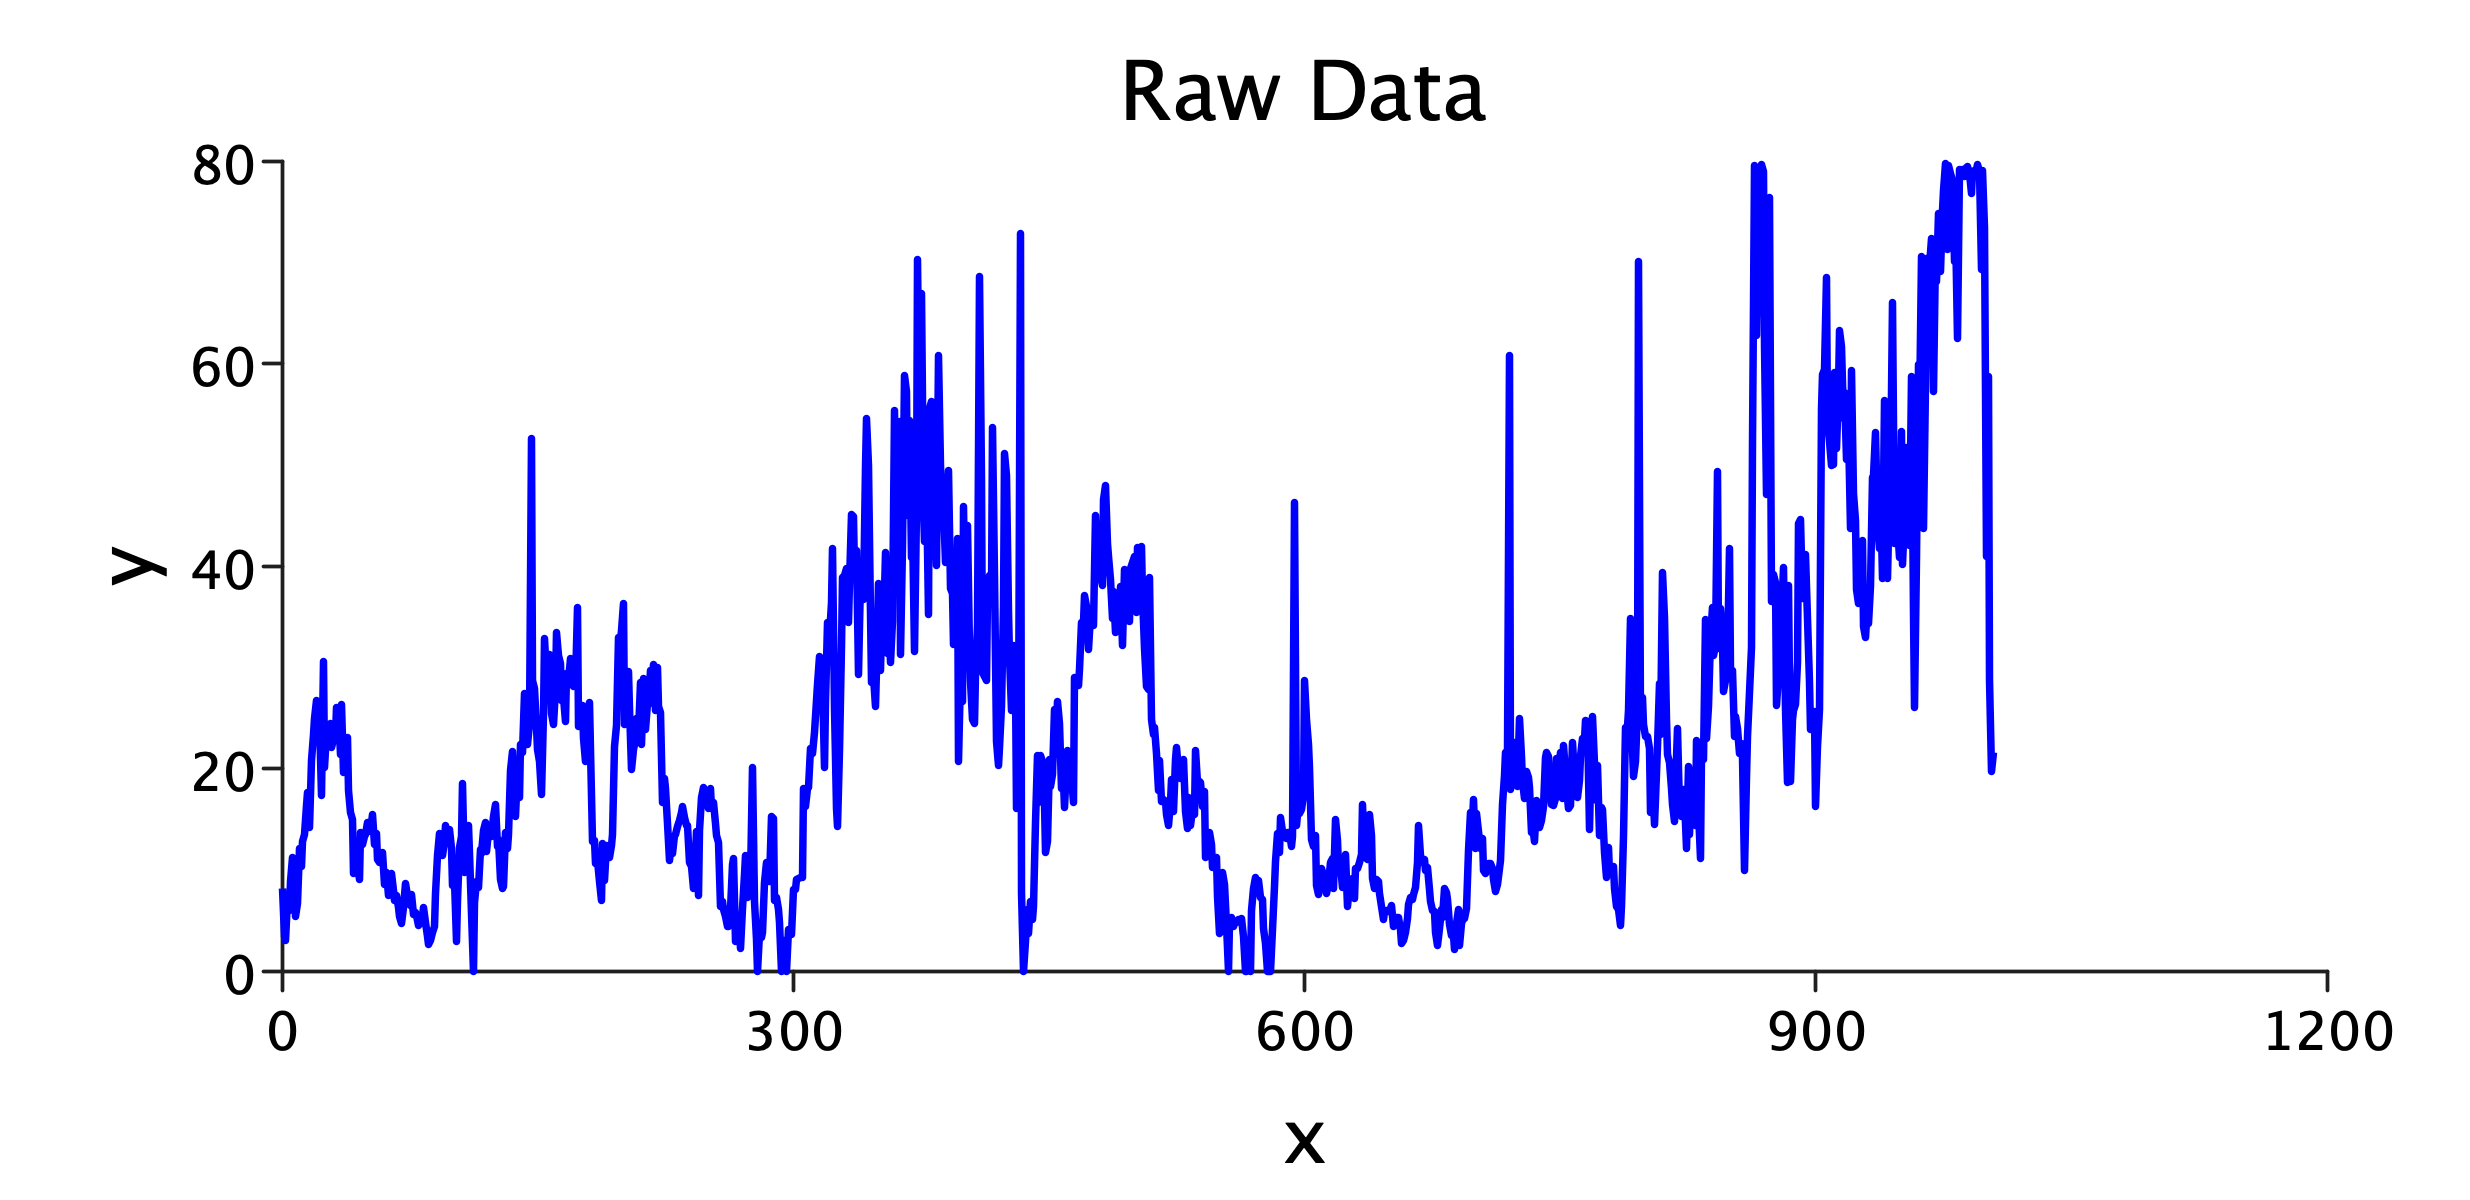

i: Int = 1005
defined function increment
defined class PointToPlot
rawData: Seq[PointToPlot] = List(
  PointToPlot(0.0, 8.16),
  PointToPlot(1.0, 3.42),
  PointToPlot(2.0, 3.04),
  PointToPlot(3.0, 7.1),
  PointToPlot(4.0, 6.02),
  PointToPlot(5.0, 8.83),
  PointToPlot(6.0, 11.2),
  PointToPlot(7.0, 10.31),
  PointToPlot(8.0, 5.4),
  PointToPlot(9.0, 6.73),
  PointToPlot(10.0, 12.11),
  PointToPlot(11.0, 10.3),
  PointToPlot(12.0, 12.85),
  PointToPlot(13.0, 13.55),
  PointToPlot(14.0, 16.34),
  PointToPlot(15.0, 17.64),
  PointToPlot(16.0, 14.22),
  PointToPlot(17.0, 20.77),
  PointToPlot(18.0, 23.39),
  PointToPlot(19.0, 24.92),
  PointToPlot(20.0, 26.78),
  PointToPlot(21.0, 26.45),
  PointToPlot(22.0, 24.86),
  PointToPlot(23.0, 17.31),
  PointToPlot(24.0, 30.63),
  PointToPlot(25.0, 20.08),
  PointToPlot(26.0, 23.54),
  PointToPlot(27.0, 23.05),
  PointToPlot(28.0, 24.44),
  PointToPlot(29.0, 22.13),
  PointToPlot(30.0, 22.89),
  PointToPlot(31.0, 23.14),
  PointToPlot(32.0, 26.06),
  PointToPlot(33.0, 25.69),
  PointToPlot(34.0, 21.38),
  PointToPlot(35.0, 26.38),
  PointToPlot(36.0, 19.59),
  PointToPlot(37.0, 22.67),
...
rawPoints: Seq[Point] = List(
  Point(0.0, 8.16),
  Point(1.0, 3.42),
  Point(2.0, 3.04),
  Point(3.0, 7.1),
  Point(4.0, 6.02),
  Point(5.0, 8.83),
  Point(6.0, 11.2),
  Point(7.0, 10.31),
  Point(8.0, 5.4),
  Point(9.0, 6.73),
  Point(10.0, 12.11),
  Point(11.0, 10.3),
  Point(12.0, 12.85),
  Point(13.0, 13.55),
  Point(14.0, 16.34),
  Point(15.0, 17.64),
  Point(16.0, 14.22),
  Point(17.0, 20.77),
  Point(18.0, 23.39),
  Point(19.0, 24.92),
  Point(20.0, 26.78),
  Point(21.0, 26.45),
  Point(22.0, 24.86),
  Point(23.0, 17.31),
  Point(24.0, 30.63),
  Point(25.0, 20.08),
  Point(26.0, 23.54),
  Point(27.0, 23.05),
  Point(28.0, 24.44),
  Point(29.0, 22.13),
  Point(30.0, 22.89),
  Point(31.0, 23.14),
  Point(32.0, 26.06),
  Point(33.0, 25.69),
  Point(34.0, 21.38),
  Point(35.0, 26.38),
  Point(36.0, 19.59),
  Point(37.0, 22.67),
...
rawPlot: Drawable = Group(
  Vector(
    Translate(
      StrokeStyle(
        Group(
          Vector(
            Translate(Rotate(Line(216.0, 1.0), 90.0), -0.5000000000000067, 0.0),
            Translate(Line(545.294921875, 1.0), 0.0, 215.5)
          )
        ),
        HSLA(0.0, 0.0, 12.0, 1.0)
      ),
      54.705078125,
      33.0
    ),
    Translate(
      Resize(
        LineDash(
          StrokeStyle(
            Translate(
              Path(
                Vector(
                  Point(0.0, 193.455),
                  Point(0.45441243489583333, 206.25300000000001),
                  Point(0.9088248697916667, 207.27900000000002),
                  Point(1.3632373046875, 196.317),
                  Point(1.8176497395833333, 199.23300000000003),
                  Point(2.2720621744791667, 191.64600000000002),
                  Point(2.726474609375, 185.247),
                  Point(3.1808870442708335, 187.65000000000003),
                  Point(3.6352994791666666, 200.907),
                  Point(4.0897119140625, 197.31600000000003),
                  Point(4.544124348958333, 182.79000000000002),
                  Point(4.998536783854167, 187.67700000000002),
                  Point(5.45294921875, 180.79200000000003),
                  Point(5.907361653645833, 178.90200000000002),
                  Point(6.361774088541667, 171.36900000000003),
                  Point(6.8161865234375, 167.859),
                  Point(7.270598958333333, 177.09300000000002),
...

In [14]:
// Raw Data
var i: Int = 0
def increment(): Int = {
    i += 1
    (i - 1)
}
final case class PointToPlot(x: Double, y: Double)
val rawData: Seq[PointToPlot] = Seq.fill(doubleData.size) {
  PointToPlot(i.toDouble, doubleData(increment()))
}
// println(s"i=$i")

val rawPoints = rawData.map(p => Point(p.x, p.y))

val rawPlot = LinePlot.series(rawPoints, "Raw", HTMLNamedColors.blue) 
  .xAxis()
  .yAxis()
  .frame()
  .title("Raw Data")
  .xLabel("x")
  .yLabel("y")
  .render(Extent(600, 300))

showPlot(rawPlot)

Filter and smooth it!

In [15]:
var filteredData = new mutable.ListBuffer[Double]()
var accumulator:Double = 0

doubleData.foreach(d => {
    accumulator = lowPass(ALPHA, d, accumulator)
    filteredData += accumulator
})
// println(s"Filtered: $filteredData")

filteredData: mutable.ListBuffer[Double] = ListBuffer(
  0.12239999726414681,
  0.17186399619957804,
  0.21488603529496686,
  0.318162742457128,
  0.40369029940858114,
  0.5300849420923119,
  0.6901336643835595,
  0.8344316561924946,
  0.902915179818881,
  0.9903214501679154,
  1.157116624687234,
  1.2942598722515348,
  1.467595970293398,
  1.6488320266880554,
  1.8691995413621367,
  2.1057615429541316,
  2.287475115748205,
  2.5647129828152324,
  2.8770922810907824,
  3.2077358894839603,
  3.5613198432384836,
  3.9046500379158786,
  4.218980280321312,
  4.415345571727386,
  4.808565379362327,
  5.037636893551745,
  5.315172333945068,
  5.581194742989828,
  5.864076815522074,
  6.108065657835667,
  6.359794667341549,
  6.611497741705423,
  6.903225269059224,
  7.1850268837245785,
  7.397951475709474,
  7.682682197209605,
  7.861291960259222,
  8.083422575890326,
...
accumulator: Double = 53.37135022806559

Draw filtered Data

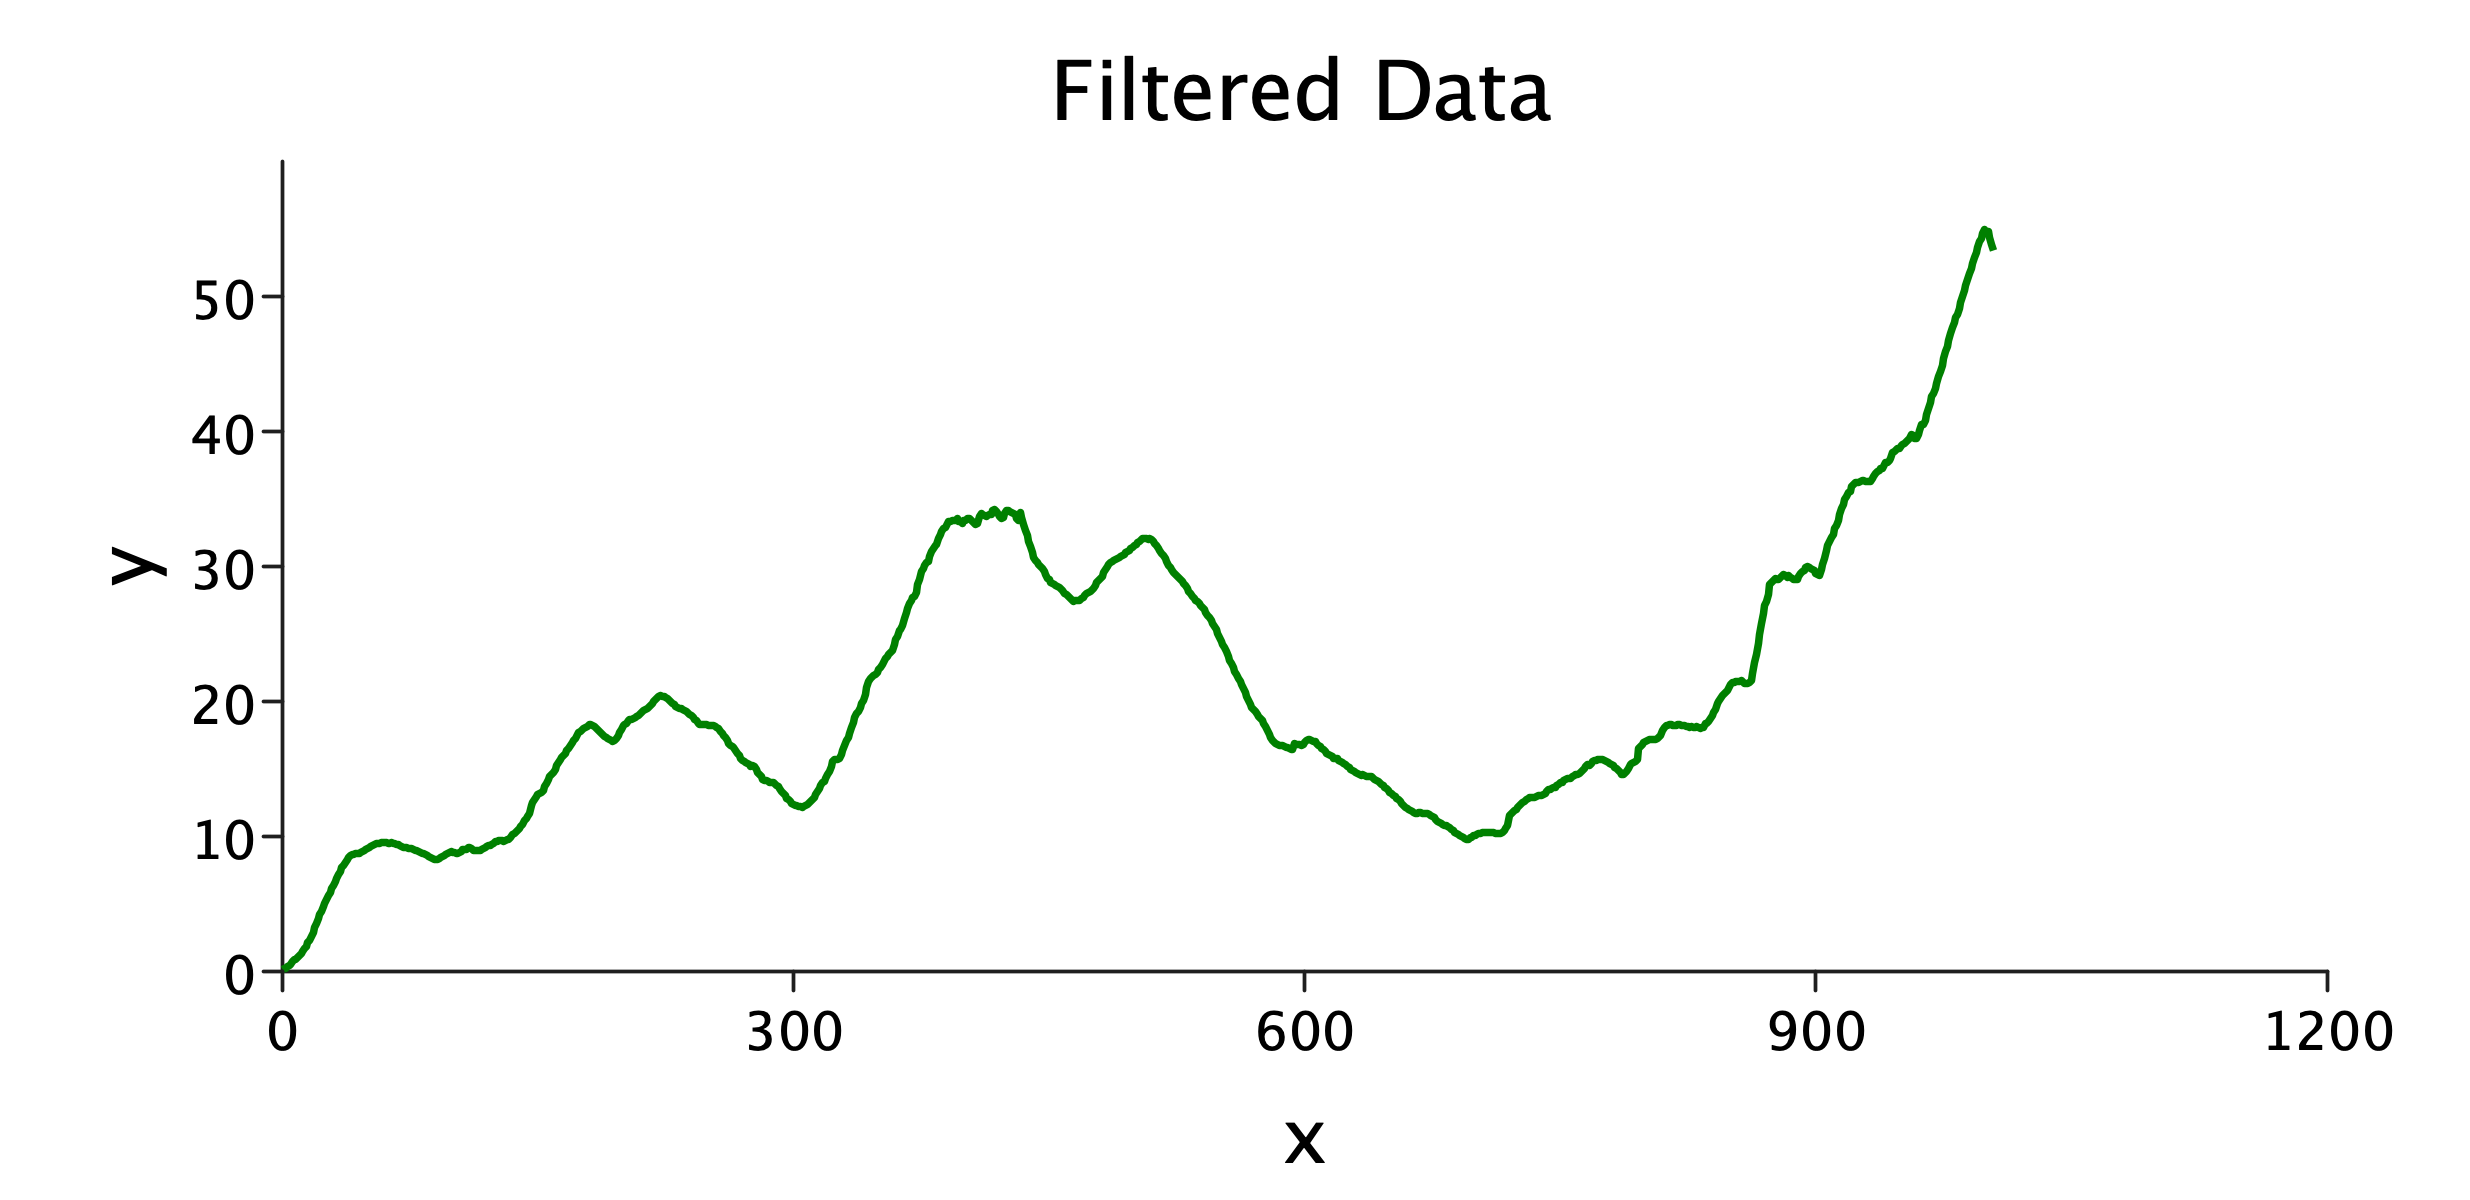

filteredDataPoints: Seq[PointToPlot] = List(
  PointToPlot(0.0, 0.12239999726414681),
  PointToPlot(1.0, 0.17186399619957804),
  PointToPlot(2.0, 0.21488603529496686),
  PointToPlot(3.0, 0.318162742457128),
  PointToPlot(4.0, 0.40369029940858114),
  PointToPlot(5.0, 0.5300849420923119),
  PointToPlot(6.0, 0.6901336643835595),
  PointToPlot(7.0, 0.8344316561924946),
  PointToPlot(8.0, 0.902915179818881),
  PointToPlot(9.0, 0.9903214501679154),
  PointToPlot(10.0, 1.157116624687234),
  PointToPlot(11.0, 1.2942598722515348),
  PointToPlot(12.0, 1.467595970293398),
  PointToPlot(13.0, 1.6488320266880554),
  PointToPlot(14.0, 1.8691995413621367),
  PointToPlot(15.0, 2.1057615429541316),
  PointToPlot(16.0, 2.287475115748205),
  PointToPlot(17.0, 2.5647129828152324),
  PointToPlot(18.0, 2.8770922810907824),
  PointToPlot(19.0, 3.2077358894839603),
  PointToPlot(20.0, 3.5613198432384836),
  PointToPlot(21.0, 3.9046500379158786),
  PointToPlot(22.0, 4.218980280321312),
  PointToPlot(23.0, 4.41

In [16]:
// Filtered Data
i = 0
val filteredDataPoints: Seq[PointToPlot] = Seq.fill(filteredData.size) {
  PointToPlot(i.toDouble, filteredData(increment()))
}

val filteredPoints = filteredDataPoints.map(p => Point(p.x, p.y))

val filteredPlot = LinePlot.series(filteredPoints, "Filtered", HTMLNamedColors.green) 
  .xAxis()
  .yAxis()
  .frame()
  .title("Filtered Data")
  .xLabel("x")
  .yLabel("y")
  .render(Extent(600, 300))

showPlot(filteredPlot)


That's it for now!